In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import pylab
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('wdbc.csv', header=None)

data.columns = ['ID', 'Diag', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29',
       'f30']
data.head()

,ID,Diag,f1,f2,f3,f4,f5,f6,f7,f8,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
features = data.drop(['ID', 'Diag'], axis=1)
features.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
def pca(A):
    scaler = StandardScaler()
    A = scaler.fit_transform(A)
    v = 1 / (A.shape[0] - 1)
    K = A.T @ A * v
    eig_values, eig_vectors = np.linalg.eig(K)
    eig_values_sorted = eig_values.argsort()[::-1]
    pc = eig_vectors[:, eig_values_sorted]
    
    eig_values = eig_values[eig_values_sorted]
    std = np.sqrt(eig_values)
    
    return pc, std

In [5]:
pc, std = pca(features)

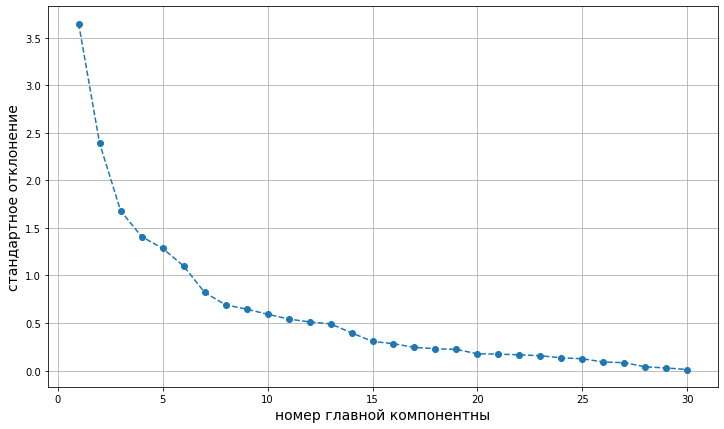

In [6]:
i = [i for i in range(1, len(std) + 1)]
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.plot(i, std, 'o--')
ax.set_xlabel('номер главной компонентны', fontsize=14)
ax.set_ylabel('стандартное отклонение', fontsize=14)
   
ax.grid()
pylab.savefig('std.pdf', bbox_inches='tight')

In [7]:
scaler = StandardScaler()
cols = features.columns
features = scaler.fit_transform(features)
features = pd.DataFrame(features, columns=[cols])

points_transformed = features @ pc

In [8]:
points = pd.DataFrame(
    {
        'Component 1': points_transformed[0],
        'Component 2': points_transformed[1],
        'Class': data.Diag
    }
)

# px.scatter(points, x='Component 1', y='Component 2', color='Class')

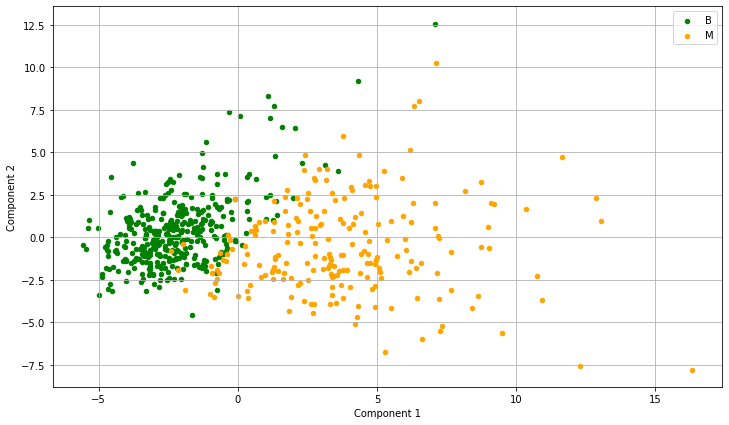

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

colors = {'M':'orange', 'B':'green'}

points = points.groupby('Class')
for key, group in points:
    group.plot(ax=ax, kind='scatter', x='Component 1', y='Component 2', label=key, color=colors[key], grid=True)


pylab.savefig('pca.pdf', bbox_inches='tight')